#AIM
The aim of this experiment is to design a DCGAN architecture for generating only the digits of 2 and 3. Then train the DCGAN architecture with regularization techniques to improve the performance.

#Algorithm

Step 1:Load the data from the MNIST dataset into the workspace

Step 2:Filter out the images only containing 2 and 3

Step 3:Plot the initial filtered out images

Step 4:Build the architecture for generator

Step 5:Build the architecture for discriminator

Step 6:Define optimizer and loss function

Step 7:Write the training steps and the functions

Step 8:Generate and save images for each epoch

Step 9: Display the generated images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Filter out images containing only digits 2 and 3
indices = np.where((y_train == 2) | (y_train == 3))
x_train = x_train[indices]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

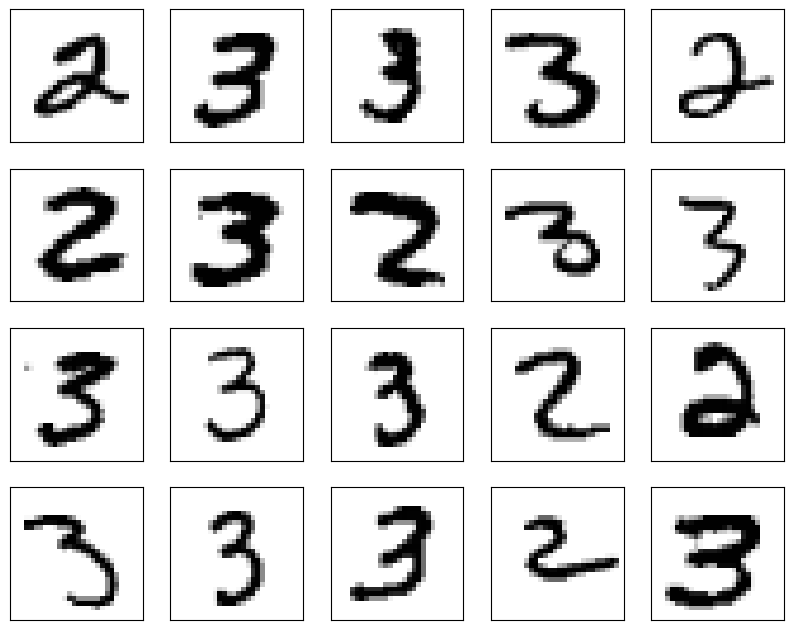

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

#Model Implementation

DCGAN - This is another simple GAN, which involves using convolutional layers in the GAN, and these are much more powerful at generating images.

The Generator: This generator takes in a noisy vector as input (random numbers), and tries to generate a picture. Obviously, the intitial images will be noise, so how do we train this network? That's where the discriminator comes in.

The Discriminator: The discriminator takes an image as input, and simply tries to identify whether it is fake (generated by the GAN) or real (from our dataset of images).

In [ ]:
# Define the generator architecture
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(7 * 7 * 64, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Reshape((7, 7, 64)))

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

In [ ]:
# Define the discriminator architecture
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
# Initialize the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

In [ ]:
# Define the optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# Define the loss function
def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output)

def discriminator_loss(real_output, fake_output):
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

In [ ]:
# Training loop
EPOCHS = 100
BATCH_SIZE = 128
noise_dim = 100

#Model Training


In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)


    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

#Output and Result
Image generated after each epoch is shown

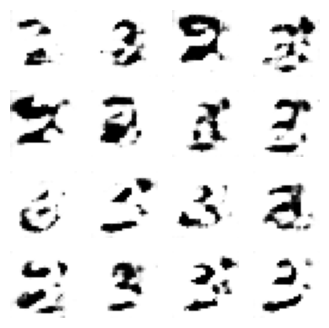

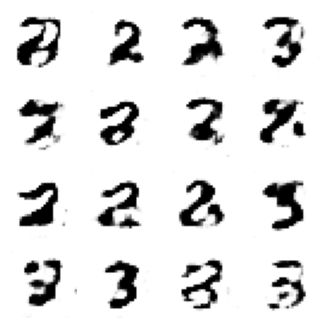

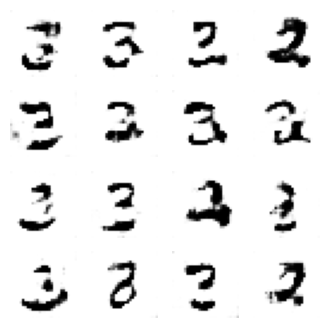

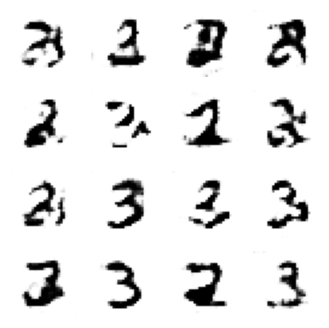

In [ ]:
# Train the model
for epoch in range(EPOCHS):
    for i in range(len(x_train) // BATCH_SIZE):
        images = x_train[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
        train_step(images)

    # Generate and save images after each epoch
    if (epoch + 1) % 5 == 0:
        noise = tf.random.normal([16, noise_dim])
        generated_images = generator(noise, training=False)

        plt.figure(figsize=(4, 4))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
            plt.axis('off')
        plt.show()

#Inference

The DCGAN architecture is really effective in generating images using the Discriminator and Generator architecture as designed. The results and the metrics are shown as per the requirements